# Should you choose Barcelona or Athens for your next holiday?
## A data based approach using Airbnb public data.
---
## Section 1: Business understanding
This notebook is meant to analyse and compare Airbnb prices and seasonal demand between Barcelona and Athens.

My analysis is based on 3 main questions:

1. How do prices compare between cities?
2. Is there a seasonal trend for demand?
3. Are prices the same for each neighbourhood?


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
'Done'

'Done'

## Section 2: Data understanding
### Gather
You can find data for these cities and many more in the following link: 
http://insideairbnb.com/get-the-data.html


In [4]:
#Airbnb Data
list_bar = pd.read_csv('C:\\Users\\luisf\\OneDrive\\Documents\\VS Code\\Data\\Udemy\\Airbnb\\listings_barcelona.csv')
list_athe = pd.read_csv('C:\\Users\\luisf\\OneDrive\\Documents\\VS Code\\Data\\Udemy\\Airbnb\\listings_greece.csv')
reviews_bar = pd.read_csv('C:\\Users\\luisf\\OneDrive\\Documents\\VS Code\\Data\\Udemy\\Airbnb\\reviews_barcelona.csv')
reviews_athe = pd.read_csv('C:\\Users\\luisf\\OneDrive\\Documents\\VS Code\\Data\\Udemy\\Airbnb\\reviews_greece.csv')

list_athe.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,57,1,25,2020-10-06,0.21,6,296
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,38,1,44,2020-12-10,0.43,6,59
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,32,1,56,2021-01-17,0.55,6,182
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,45,1,23,2020-10-03,0.18,6,1
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,38,1,17,2020-01-08,0.17,6,48


In [5]:
#Datatype check

print(reviews_bar.dtypes)
print('-------------')
print(reviews_athe.dtypes)
print('-------------')
print(list_athe.dtypes)
print('-------------')
print(list_bar.dtypes)

listing_id     int64
date          object
dtype: object
-------------
listing_id     int64
date          object
dtype: object
-------------
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
-------------
id                                  int64
name                               object
host_id                             int64
host_name                         

In [18]:
#Function definition

def get_missing_vals (df):
    '''
    Input:
    df - Pandas dataframe to check for missing values

    Output:
    prints the columns of the dataframe and their respective percentage of missing values

    '''
    
   return df.isnull().mean().round(2)

In [19]:
# Missing values check - Athens listings

get_missing_vals(list_athe)

id                                0.00
name                              0.00
host_id                           0.00
host_name                         0.00
neighbourhood_group               1.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.23
reviews_per_month                 0.23
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [20]:
# Missing values check - Barcelona listings
get_missing_vals(list_bar)

id                                0.00
name                              0.00
host_id                           0.00
host_name                         0.00
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.31
reviews_per_month                 0.31
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [21]:
# Missing review values check

print(get_missing_vals(reviews_athe))
print('---------------')
print(get_missing_vals(reviews_bar))

listing_id    0.0
date          0.0
Month         0.0
dtype: float64
---------------
listing_id    0.0
date          0.0
Month         0.0
dtype: float64


In [9]:
# Descriptive analytics 

print('---Price in Barcelona---')
print(list_bar['price'].describe())

print('\n''---Price in Athens---')
print(list_athe['price'].describe())

---Price in Barcelona---
count    18471.000000
mean       103.764387
std        420.594777
min          0.000000
25%         34.000000
50%         54.000000
75%         95.000000
max      11500.000000
Name: price, dtype: float64

---Price in Athens---
count    9482.000000
mean       74.333896
std       346.643039
min         0.000000
25%        30.000000
50%        43.000000
75%        65.000000
max      8000.000000
Name: price, dtype: float64


## Section 3: Data preparation

The missing values do not interfere with our analysis so I´ll leave them as is. For the seasonal analysis I´ll need to cast date values as datetime type in order to model data by months.

In [10]:
#Casting date columns as datetime
reviews_bar['date'] = pd.to_datetime(reviews_bar['date'])
reviews_athe['date'] = pd.to_datetime(reviews_athe['date'])

reviews_bar.dtypes

listing_id             int64
date          datetime64[ns]
dtype: object

## Section 4: Evaluation


Text(0.5, 0, 'Price')

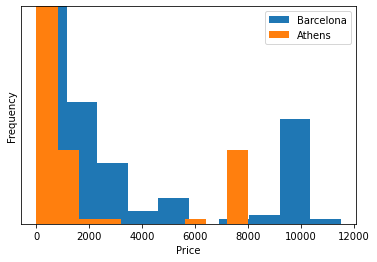

In [11]:
#Histogram analysis 

list_bar['price'].plot(kind='hist',ylim=(0,50))
list_athe['price'].plot(kind='hist',ylim=(0,50))

#Plotting format
plt.legend(['Barcelona','Athens'])
plt.yticks([])
plt.xlabel('Price')

 ## Question 1: How do prices compare between cities?

As we can see in the descriptive charts and graph above, Barcelona is in average more expensive than Athens. Both citites have a wide range of offers to choose from, but in general, Athens seems like a better option if you are on a budget.


In [12]:
#Extracting months from each date

reviews_bar['Month'] = reviews_bar['date'].dt.month
reviews_athe['Month'] = reviews_athe['date'].dt.month

reviews_bar.head()

,listing_id,date,Month
0,18674,2013-05-27,5
1,18674,2014-03-02,3
2,18674,2015-08-04,8
3,18674,2016-06-20,6
4,18674,2018-06-18,6


In [13]:
#Sort and group data by month and city 
bar_month = reviews_bar['Month'].value_counts()
athe_month = reviews_athe['Month'].value_counts()

bar_month.sort_index(inplace=True)
athe_month.sort_index(inplace=True)

bar_month = pd.DataFrame(bar_month)
athe_month = pd.DataFrame(athe_month)

bar_month.columns = ['Barcelona']
athe_month.columns = ['Athens']


print(athe_month)
print(bar_month)

    Athens
1    19048
2    17547
3    18986
4    22317
5    30771
6    35063
7    40149
8    42382
9    47319
10   38920
11   23139
12   18051
    Barcelona
1       36699
2       38547
3       43436
4       46324
5       53791
6       55837
7       59959
8       56470
9       59831
10      60351
11      38911
12      31258


In [14]:
#Create a dataframe with monthly data of both cities
month_dt = bar_month.join(athe_month)

month_dt

,Barcelona,Athens
1,36699,19048
2,38547,17547
3,43436,18986
4,46324,22317
5,53791,30771
6,55837,35063
7,59959,40149
8,56470,42382
9,59831,47319
10,60351,38920


([], [])

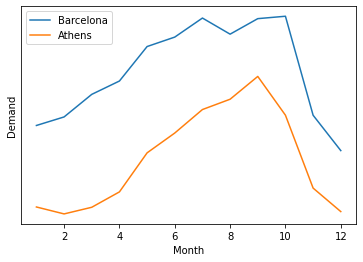

In [15]:
#Plot monthly demand and seasonal behavior

month_dt.plot(kind='line')

#Plot format
plt.xlabel('Month')
plt.ylabel('Demand')
plt.yticks([])

## Question 2: Is there a seasonal trend for demand?
As we can see in the line plot, the busier months start on July and continue up to October. If you don’t like crowds and you can wait for occupation to drop, the first trimester of the year seems like your best option. 



In [11]:
#Group by neighbourhood and average mean price

neig_bar = list_bar[['neighbourhood_group','price']].groupby(['neighbourhood_group']).mean().sort_values(by='price',ascending=False)
neig_athe = list_athe[['neighbourhood','price']].groupby(['neighbourhood']).mean().sort_values(by='price',ascending=False)

print('Barcelona')
print(neig_bar)
print('\n''Athens')
print(neig_athe)

Barcelona
                          price
neighbourhood_group            
Les Corts            437.508816
Eixample             114.156578
Sarrià-Sant Gervasi  100.491566
Sant Martí            99.888770
Gràcia                96.416940
Ciutat Vella          86.166706
Sants-Montjuïc        79.585005
Horta-Guinardó        64.031614
Sant Andreu           62.569966
Nou Barris            37.760618

Athens
                                       price
neighbourhood                               
ΠΕΤΡΑΛΩΝΑ                         267.294118
ΠΕΝΤΑΓΩΝΟ                         195.250000
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                 164.888889
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  108.286207
ΣΤΑΔΙΟ                            107.486188
ΛΥΚΑΒΗΤΤΟΣ                         94.850394
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ             90.260314
ΡΗΓΙΛΛΗΣ                           80.846154
ΒΟΤΑΝΙΚΟΣ                          80.474359
ΚΕΡΑΜΕΙΚΟΣ                         80.040650
ΑΚΡΟΠΟΛΗ                           79.850163
ΖΑΠΠΕΙΟ      

## Question 3: Are prices the same for each neighbourhood?
Average prices vary significantly depending on which neighbourhood you choose. There is a wide offer of prices to choose from in both cities. 
